In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
hotstar = pd.read_csv("D:\disney_plus_shows.csv")

In [5]:
hotstar

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,NaN,NaN,5.5,"2,339"


In [35]:
hotstar.describe()

,metascore,imdb_rating
count,292.000000,879.000000
mean,62.061644,6.656428
std,15.776455,1.020352
min,19.000000,1.500000
25%,51.000000,6.100000
50%,61.000000,6.700000
75%,73.000000,7.400000
max,99.000000,9.700000


In [36]:
hotstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     856 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

In [8]:
hotstar.isnull().sum()

imdb_id         98
title           98
plot           126
type            98
rated          250
year            98
released_at    118
added_at         0
runtime        154
genre          107
director       303
writer         249
actors         122
language       136
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64

In [37]:
hotstar.columns

Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'added_at', 'runtime', 'genre', 'director', 'writer', 'actors',
       'language', 'country', 'awards', 'metascore', 'imdb_rating',
       'imdb_votes'],
      dtype='object')

In [38]:
# change year column into INT first we will remove the tail dashses from the values then we will change
# it into INt

hotstar['year'] = hotstar['year'].astype(str).str.replace(r'–$', '', regex=True)  # Remove dash at the end
hotstar["year"] = pd.to_numeric(hotstar["year"], errors = "coerce").astype("Int64")


In [39]:
hotstar["year"].dtype

Int64Dtype()

In [40]:
# to get the proper year values we will use median so that It will change the standard deviation calculation

median_year = hotstar["year"].median()
hotstar["year"].fillna(median_year, inplace = True)

In [41]:
# changed the Imdb votes column from float to INT. 

hotstar["imdb_votes"] = hotstar["imdb_votes"].str.replace(",","", regex = True).astype("Int64")

In [42]:
hotstar["imdb_votes"].dtypes

Int64Dtype()

In [43]:
hotstar.isnull().sum()

imdb_id         98
title           98
plot           126
type            98
rated          250
year             0
released_at    118
added_at         0
runtime        154
genre          107
director       303
writer         249
actors         122
language       136
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64

In [44]:
# change the NAN to No info from various columns 

hotstar["awards"].fillna("No Info", inplace = True)

hotstar["director"].fillna("No Info", inplace = True)

hotstar["country"].fillna("No Info", inplace = True)

hotstar["genre"].fillna("No Info", inplace = True)

hotstar["type"].fillna("No Info", inplace = True)

hotstar["title"].fillna("No Info", inplace = True)

hotstar["writer"].fillna("No Info", inplace = True)
hotstar["awards"].fillna("No Info", inplace = True)
hotstar["plot"].fillna("No Info", inplace = True)
hotstar["rated"].fillna("No Info", inplace= True)
hotstar["actors"].fillna("No Info", inplace = True)
hotstar["language"].fillna("No Info", inplace = True)
hotstar["imdb_id"].fillna("No Info", inplace = True)

In [45]:
hotstar

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,283945
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,No Info,2018,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",No Info,No Info,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",No Info,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,97785
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,7434
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,33444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,3750
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,6378
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,3318
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,No Info,NaN,5.5,2339


In [46]:
#changed the Metascore from Float to INT
hotstar["metascore"] = hotstar["metascore"].astype("Int64")

In [47]:
hotstar.describe()

,year,metascore,imdb_rating,imdb_votes
count,992.0,292.0,879.000000,879.0
mean,1998.016129,62.061644,6.656428,62547.227531
std,21.634095,15.776455,1.020352,172117.190743
min,1928.0,19.0,1.500000,5.0
25%,1997.0,51.0,6.100000,695.0
50%,2004.0,61.0,6.700000,3952.0
75%,2012.0,73.0,7.400000,24223.0
max,2020.0,99.0,9.700000,1225316.0


In [48]:
#removed the column added_at as it was not required 

hotstar.drop(["added_at"], axis = 1, inplace = True)

In [49]:
hotstar.head(5)

,imdb_id,title,plot,type,rated,year,released_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70,7.3,283945
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,No Info,2018,25 Mar 2019,NaN,"Animation, Comedy, Family",No Info,No Info,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",No Info,<NA>,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49,5.7,97785
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,<NA>,5.8,7434
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35,4.9,33444


In [50]:
np.shape(hotstar)

(992, 18)

In [51]:
hotstar.dropna(subset=["year"])

,imdb_id,title,plot,type,rated,year,released_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70,7.3,283945
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,No Info,2018,25 Mar 2019,NaN,"Animation, Comedy, Family",No Info,No Info,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",No Info,<NA>,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49,5.7,97785
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,<NA>,5.8,7434
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35,4.9,33444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,<NA>,5.1,3750
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,<NA>,6.4,6378
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,<NA>,5.9,3318
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,No Info,<NA>,5.5,2339


In [52]:
hotstar.isnull().sum()

imdb_id          0
title            0
plot             0
type             0
rated            0
year             0
released_at    118
runtime        154
genre            0
director         0
writer           0
actors           0
language         0
country          0
awards           0
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64

In [53]:
hotstar.columns

Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'runtime', 'genre', 'director', 'writer', 'actors', 'language',
       'country', 'awards', 'metascore', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [54]:
np.shape(hotstar)

(992, 18)

In [55]:
group_data = hotstar.groupby(["type", "language"]).size().reset_index(name = "count").sort_values(by="type", ascending=False)

print(group_data)

       type                                           language  count
79   series                                    Spanish, German      1
72   series  English, Spanish, German, Japanese, French, Ab...      1
66   series                                            English    165
68   series                                    English, French      1
69   series                                    English, Korean      1
..      ...                                                ...    ...
3   episode                   English, Brazilian Sign Language      1
2   episode                                            English      8
1   episode                            Brazilian Sign Language      1
4   episode                                            No Info     13
0   No Info                                            No Info     98

[80 rows x 3 columns]


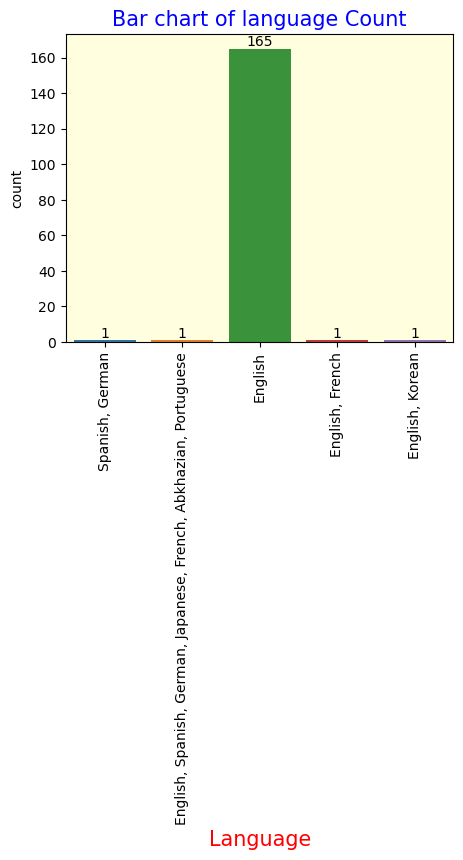

In [72]:
#create a bar chart to check in which language hotstar data set have maximum content
plt.figure(figsize = (5,4))
df = sns.barplot(x = "language", y ="count", data = group_data.head(5) )
df.bar_label(df.containers[0])
df.set_facecolor("lightyellow")
plt.xlabel("Language", fontsize = 15, color = "red")
plt.title("Bar chart of language Count",fontsize = 15, color= "blue")
plt.xticks(rotation = 90)
plt.show()

In [56]:
#use group by to create a pie chart
type_content  = hotstar.value_counts("type")

In [30]:
type_content

type
movie      680
series     191
No Info     98
episode     23
Name: count, dtype: int64

In [59]:
#create to pie chart to check the movies and series distribution 
dis_data = hotstar["type"].value_counts()


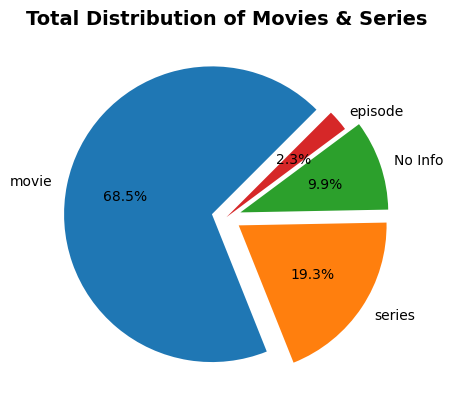

In [71]:
plt.pie(dis_data, labels = dis_data.index, autopct = "%1.1f%%", explode = [0.1,0.1,0.1,0], startangle = 45)
plt.title("Total Distribution of Movies & Series", fontsize=14, fontweight="bold")
plt.show()

In [73]:
#top 10 content of Hotstar
#firt sort the values of the imdb_rating column in order to get the top 10 tiles on the basic of sorting.
#seconf sort the values of the imdb_votes colum in order to get the top 10 titles on the basis of sorting

top10 = hotstar.sort_values(by = "imdb_rating", ascending=False).head(10)

top11 = hotstar.sort_values(by = "imdb_votes", ascending = False).head(10)

In [74]:
#changed the float value into integer 

hotstar["imdb_rating"] = pd.to_numeric(hotstar["imdb_rating"], errors = "coerce").round().astype("Int64")

In [75]:
hotstar["imdb_rating"].dtypes

Int64Dtype()

In [76]:
#drop NA from the column imdb_rating

hotstar.dropna(subset = ["imdb_rating"], axis = 0, inplace = True)

In [77]:
hotstar["imdb_rating"].dtypes

Int64Dtype()

In [78]:
#checking imdb_rating column presense

print("imdb_rating" in hotstar.columns)


True


In [79]:
#top 10 hotstar movies and series according to the IMDB rating 

top10

,imdb_id,title,plot,type,rated,year,released_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
70,tt7678620,Bluey,Bluey follows the adventures of a lovable and ...,series,TV-Y,2018,09 Sep 2019,NaN,Animation,No Info,Joe Brumm,"David McCormack, Melanie Zanetti",English,"Australia, UK",4 wins.,<NA>,9.7,949
807,tt9331982,The Imagineering Story,The inside look into the Walt Disney Imagineer...,series,No Info,2019,12 Nov 2019,60 min,Documentary,No Info,No Info,"Angela Bassett, Tom Morris, Kevin Rafferty, To...",No Info,USA,No Info,<NA>,9.1,1194
170,tt1865718,Gravity Falls,Twin siblings Dipper and Mabel Pines spend the...,series,TV-Y7,2004,15 Jun 2012,23 min,"Animation, Action, Adventure, Comedy, Family, ...",No Info,Alex Hirsch,"Jason Ritter, Alex Hirsch, Kristen Schaal, Lin...",English,USA,Won 2 Primetime Emmys. Another 11 wins & 34 no...,<NA>,8.9,63771
237,tt11151654,"Dr. T, Lone Star Vet",Dr. Lauren Thielen (Dr. T) is back home in Tex...,series,No Info,2019,13 Oct 2019,NaN,Reality-TV,No Info,No Info,"Chris Payne Gilbert, Lauren Thielen",English,USA,No Info,<NA>,8.9,17
559,tt4555736,Muppet Moments,No Info,series,No Info,2015,03 Apr 2015,NaN,"Short, Family",No Info,No Info,"Bill Barretta, Dave Goelz, Eric Jacobson, Stev...",English,USA,No Info,<NA>,8.8,6
583,tt7651892,One Strange Rock,The extraordinary story of Earth and why it is...,series,TV-PG,2018,26 Mar 2018,47 min,Documentary,No Info,No Info,"Will Smith, Chris Hadfield, Jerry Linenger, Ma...","English, Spanish, Indonesian, Chinese, Arabic,...",USA,1 win & 3 nominations.,<NA>,8.8,5420
875,tt0096697,The Simpsons,The satiric adventures of a working-class fami...,series,TV-PG,1989,17 Dec 1989,22 min,"Animation, Comedy",No Info,"James L. Brooks, Matt Groening, Sam Simon","Dan Castellaneta, Nancy Cartwright, Harry Shea...","English, Spanish, Albanian, French, Japanese, ...",USA,Nominated for 1 Golden Globe. Another 168 wins...,<NA>,8.7,328282
831,tt8111088,The Mandalorian,The travels of a lone bounty hunter in the out...,series,TV-PG,2019,12 Nov 2019,30 min,"Action, Adventure, Sci-Fi",No Info,Jon Favreau,"Pedro Pascal, Carl Weathers, Rio Hackford, Gin...",English,USA,5 wins & 10 nominations.,<NA>,8.7,157153
457,tt10366494,Lost Cities with Albert Lin,"Utilizing ground-penetrating radar, LiDar and ...",series,No Info,2019,01 Oct 2019,NaN,"Documentary, History",No Info,No Info,"Duncan Lees, Joseph Angelo Steel",English,USA,No Info,<NA>,8.7,63
719,tt0080684,Star Wars: Episode V - The Empire Strikes Back,After the Rebels are brutally overpowered by t...,movie,PG,1980,20 Jun 1980,124 min,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",English,USA,Won 1 Oscar. Another 24 wins & 20 nominations.,82,8.7,1109656


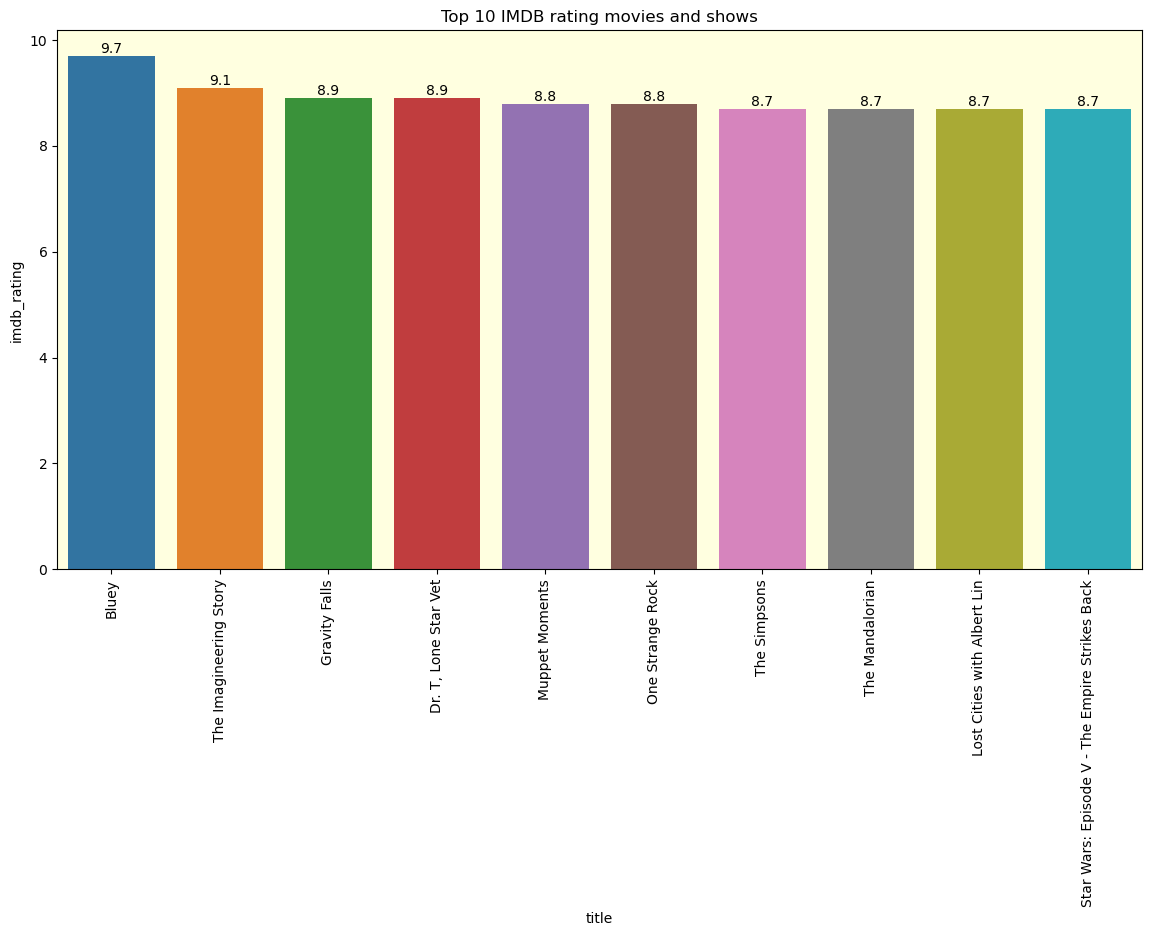

In [80]:
plt.figure(figsize = (14,7))
an = sns.barplot(x="title", y="imdb_rating", data = top10)
an.set_facecolor("lightyellow")
plt.xticks(rotation = 90)
plt.title("Top 10 IMDB rating movies and shows")
an.bar_label(an.containers[0])
plt.show()

In [81]:
#top 10 series 

top10mseries = hotstar[hotstar["type"] == "series"].sort_values(by="imdb_rating", ascending=False).head(10)


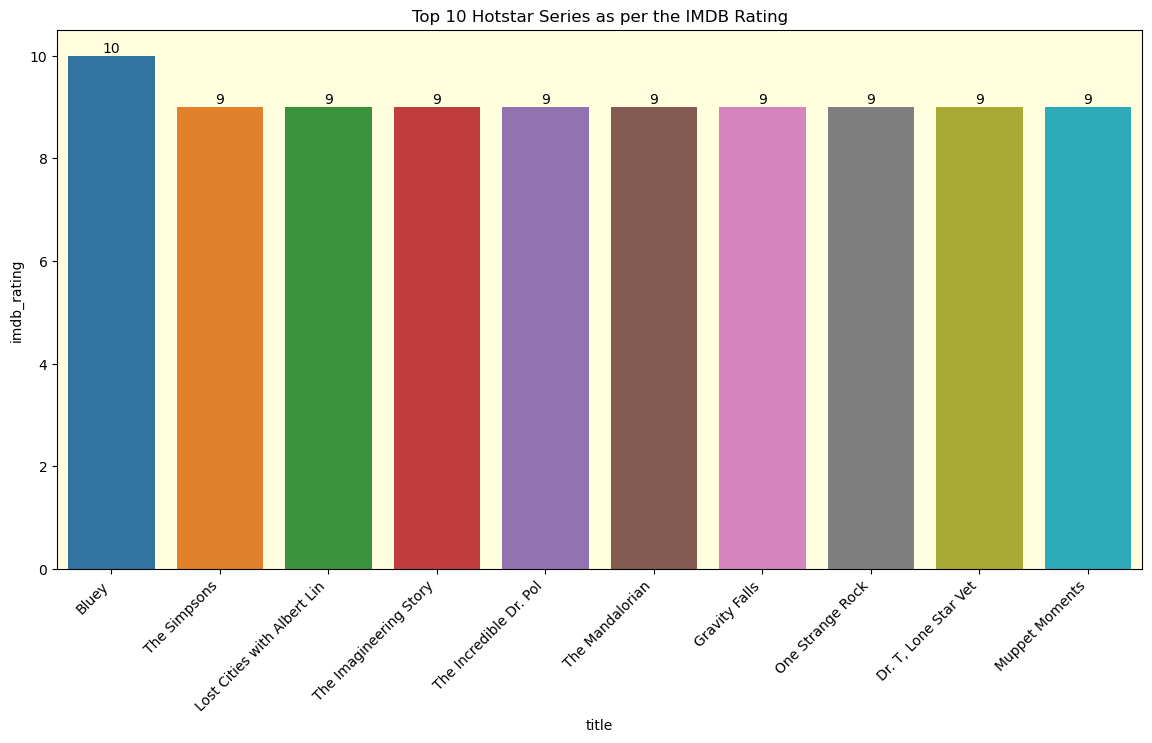

In [82]:
# bar chart to check the top 10 
plt.figure(figsize = (14,7))
ax = sns.barplot(x = "title", y = "imdb_rating", data= top10mseries )
ax.set_facecolor("lightyellow")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45, ha = "right")
plt.title("Top 10 Hotstar Series as per the IMDB Rating")
plt.show()

In [83]:
#Top 10 movies we will as per the imdb rating 

top10m = hotstar[hotstar["type"] == "movie"].sort_values(by = "imdb_rating", ascending = False).head(10)

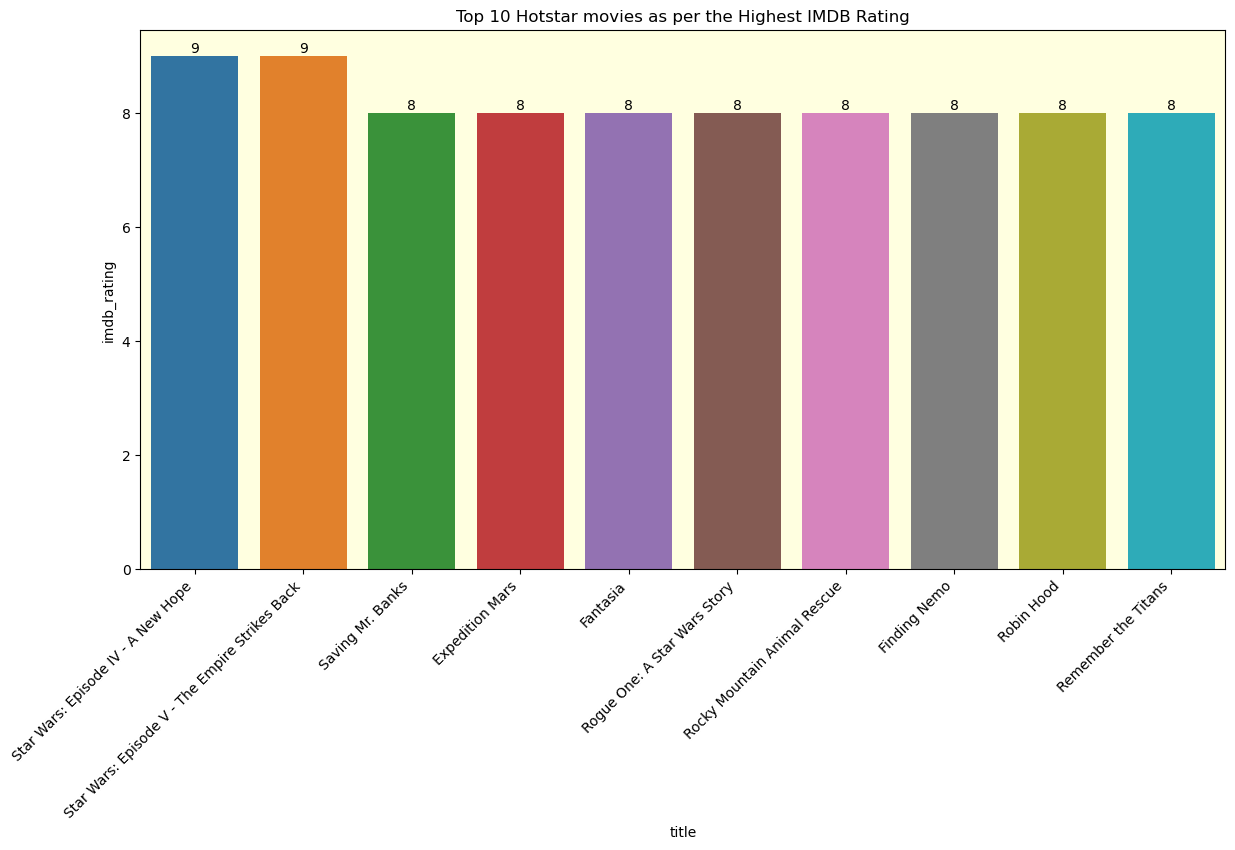

In [84]:
plt.figure(figsize =(14,7))
sd =sns.barplot(x = "title", y = "imdb_rating", data = top10m)
sd.bar_label(sd.containers[0])
sd.set_facecolor("lightyellow")
plt.xticks(rotation = 45,ha = "right")
plt.title("Top 10 Hotstar movies as per the Highest IMDB Rating")
plt.show()

In [85]:
# categorically we will check most voted IMDB content

top10movie = hotstar[hotstar["type"]== "movie"].sort_values(by="imdb_votes", ascending = False).head(10)

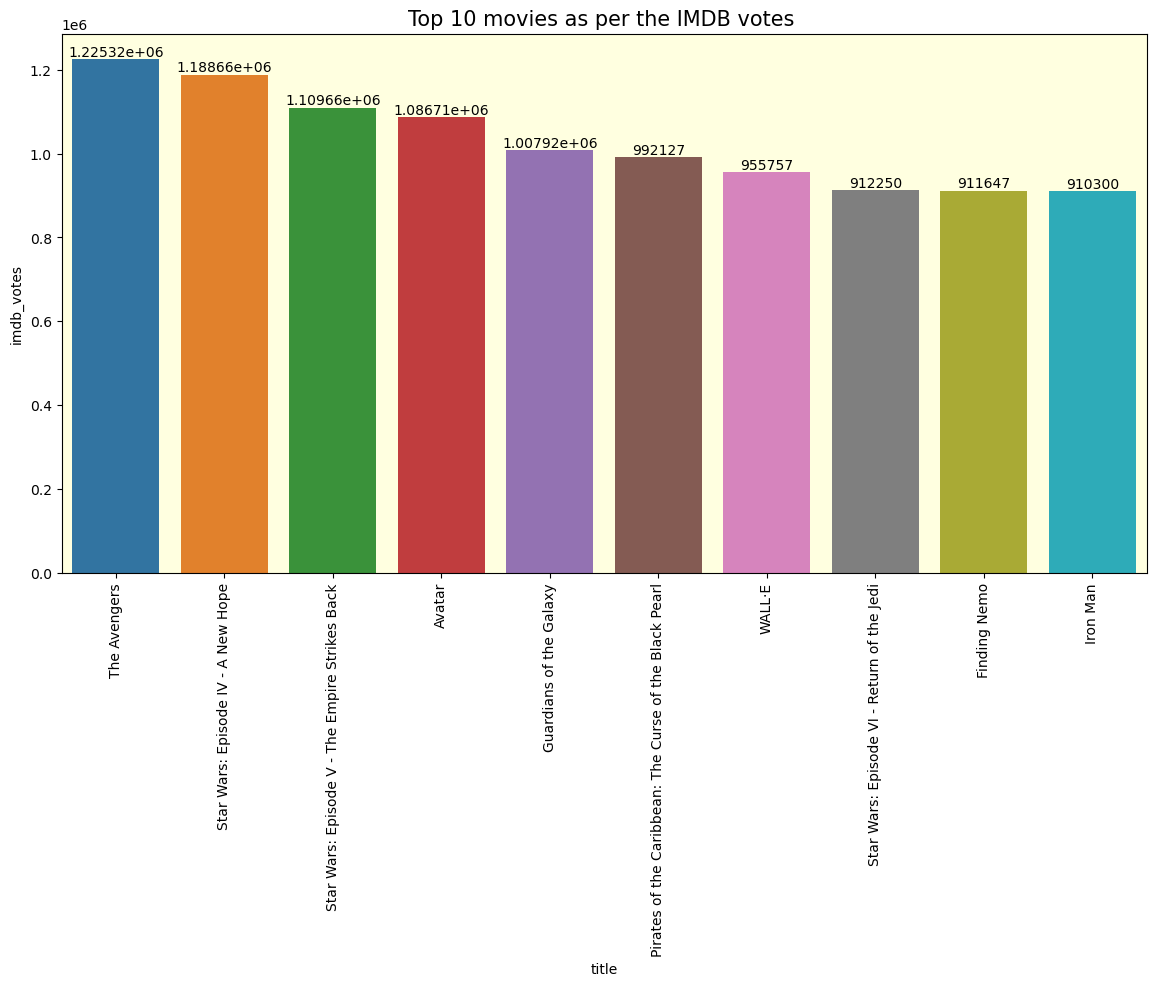

In [86]:
plt.figure(figsize = (14,7))
ty = sns.barplot(x = "title", y = "imdb_votes", data = top10movie)
ty.bar_label(ty.containers[0])
ty.set_facecolor("lightyellow")
plt.xticks(rotation = 90)
plt.title("Top 10 movies as per the IMDB votes ", fontsize = 15)
plt.show()

In [91]:
hotstar.dropna(subset = ["imdb_votes"], axis = 0 , inplace = True)

In [92]:
top10series = hotstar[hotstar["type"]=="series"].sort_values(by = "imdb_votes", ascending = False).head(10)

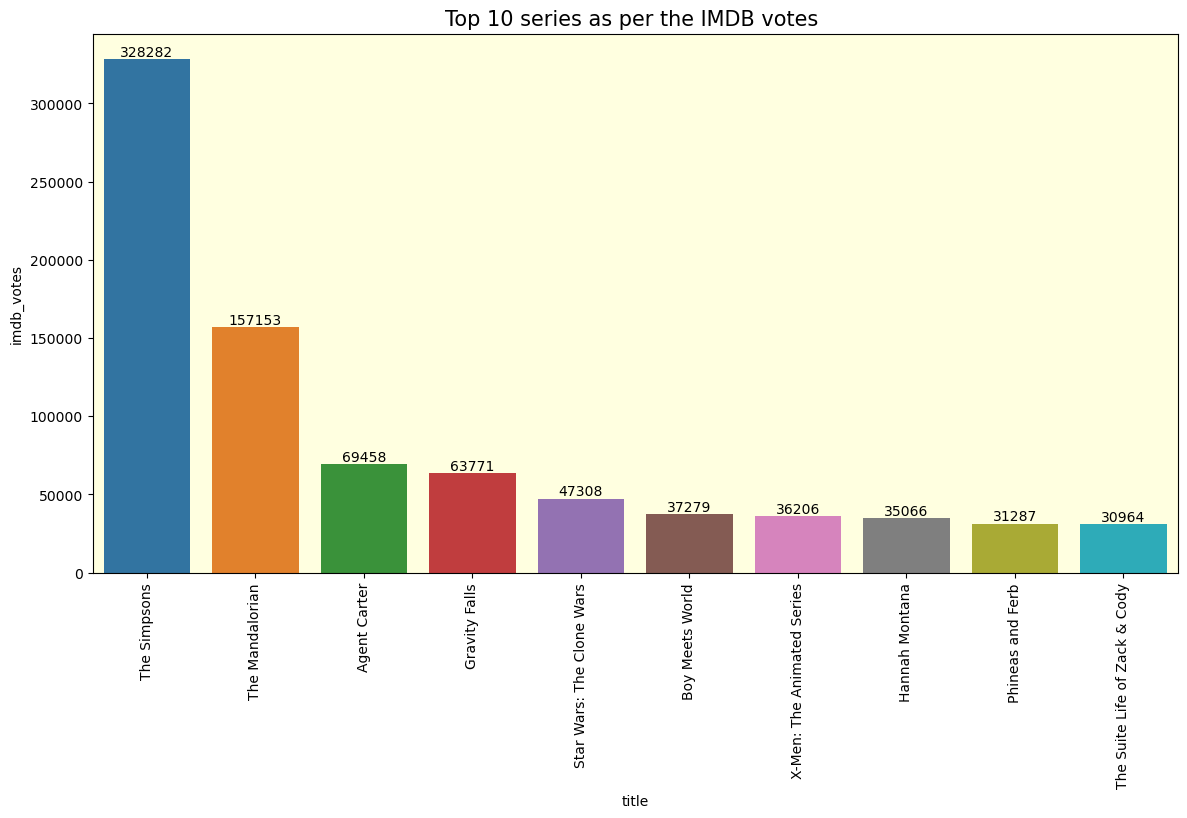

In [93]:
plt.figure(figsize = (14,7))
rt= sns.barplot(x = "title", y = "imdb_votes", data = top10series)
rt.bar_label(rt.containers[0])

rt.set_facecolor("lightyellow")
plt.xticks(rotation = 90)
plt.title("Top 10 series as per the IMDB votes ", fontsize = 15)
plt.show()

In [96]:
#year wise trending Line chart 

year_count = hotstar["year"].value_counts().reset_index(name = "count")

year_wise = year_count.sort_values(by="count", ascending=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


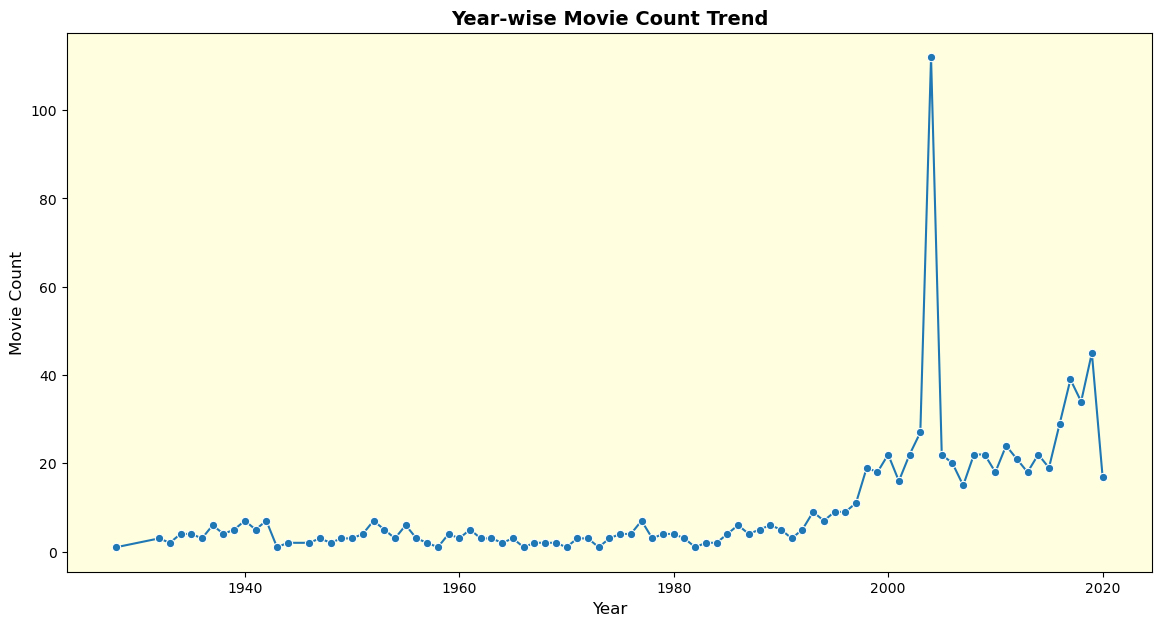

In [102]:
plt.figure(figsize = (14,7))
sa = sns.lineplot(x = "year", y = "count", data = year_wise, marker = "o")
sa.set_facecolor("lightyellow")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Movie Count", fontsize=12)
plt.title("Year-wise Movie Count Trend", fontsize=14, fontweight="bold")
plt.show()

In [103]:
# count the most watch genre 

genre = hotstar["genre"].value_counts().reset_index(name = "count")
genre.columns = ["genre", "count"]


In [104]:
genre

,genre,count
0,Documentary,49
1,"Comedy, Family",27
2,"Comedy, Drama, Family",19
3,"Animation, Short, Comedy, Family",17
4,"Animation, Adventure, Comedy, Family, Fantasy",17
...,...,...
361,"Family, Adventure, Comedy, Drama",1
362,"Family, Drama, Western",1
363,"Action, Adventure, Comedy",1
364,"Animation, Action, Adventure, Comedy, Family, ...",1


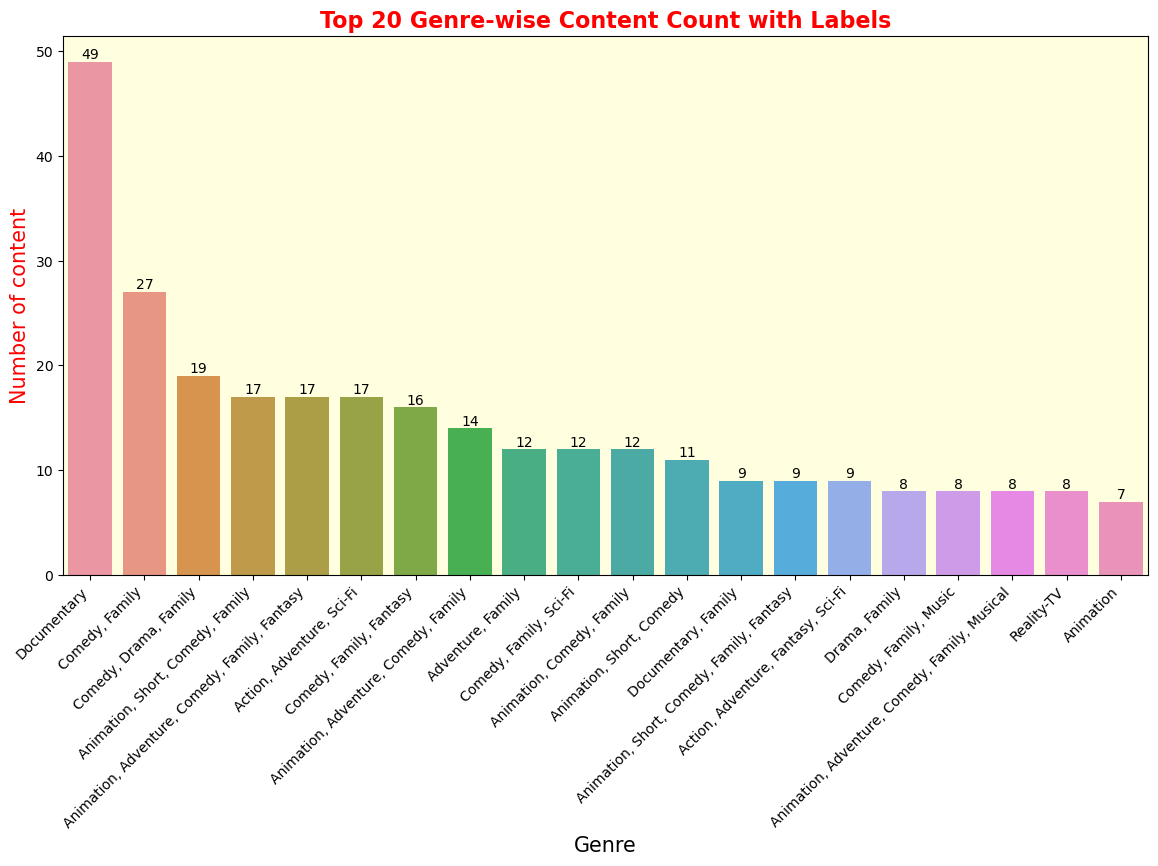

In [105]:
plt.figure(figsize = (14,7))
xs = sns.barplot(x = "genre", y = "count", data = genre.head(20))
xs.set_facecolor("lightyellow")
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Number of content", color = "red", fontsize = 15)
plt.xlabel ("Genre", fontsize = 15)

plt.title("Top 20 Genre-wise Content Count with Labels", fontsize=16, color = "red", fontweight="bold")
xs.bar_label(xs.containers[0])
plt.show()

In [106]:
# first we will count the number movies released as per the year
movie_count = hotstar[hotstar["type"] == "movie"].sort_values(by = "year", ascending = False)


In [107]:
print(movie_count)

        imdb_id                       title  \
427  tt10167262                   Lamp Life   
456   tt9536836                        Loop   
724   tt4858674                    Stargirl   
257  tt12036052                    Elephant   
594  tt12080904  Penguins: Life on the Edge   
..          ...                         ...   
848   tt0024451              The Pied Piper   
42    tt0022647          Babes in the Woods   
279   tt0022899           Flowers and Trees   
668   tt0023422            Santa's Workshop   
726   tt0019422            Steamboat Willie   

                                                  plot   type     rated  year  \
427  Short that shows what happened to Bo Peep and ...  movie   No Info  2020   
456  In LOOP, two kids at canoe camp find themselve...  movie        PG  2020   
724  A boy becomes intrigued by a mysterious and qu...  movie        PG  2020   
257  Documentary follows an African elephant named ...  movie   No Info  2020   
594  Follows the witty and ten

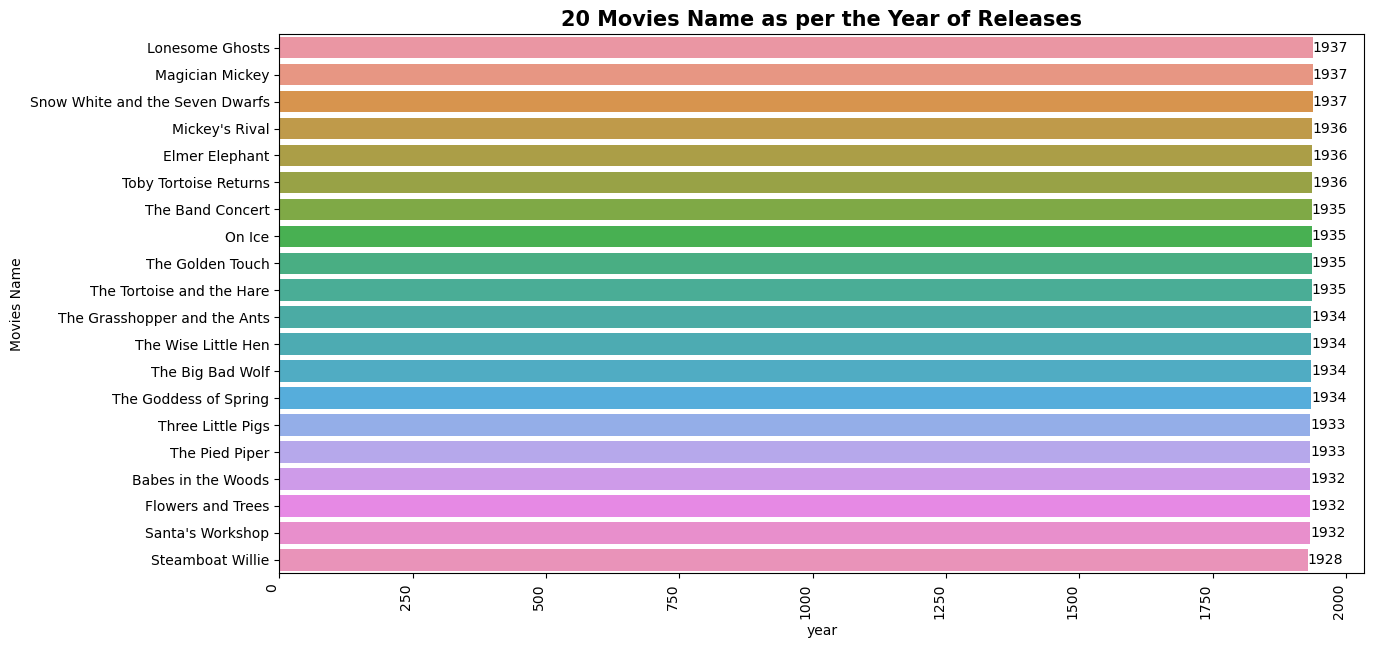

In [112]:
plt.figure(figsize =(14,7))
sd= sns.barplot(x = "year", y = "title", data = movie_count.tail(20))
plt.xticks(rotation = 90, ha = "right" )
sd.bar_label(sd.containers[0])
plt.title("20 Movies Name as per the Year of Releases",fontsize = 15, fontweight="bold")
plt.ylabel("Movies Name", fontsize = 10)

plt.show()

In [113]:
hotstar.columns

Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'runtime', 'genre', 'director', 'writer', 'actors', 'language',
       'country', 'awards', 'metascore', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [114]:
award1 =hotstar["awards"].value_counts().reset_index(name = "count")
award1.columns=["awards", "count"]

In [115]:
award1

,awards,count
0,No Info,323
1,1 nomination.,56
2,2 nominations.,43
3,1 win.,23
4,3 nominations.,22
...,...,...
254,Nominated for 3 Oscars. Another 1 win & 2 nomi...,1
255,Nominated for 1 BAFTA Film Award. Another 1 wi...,1
256,Won 4 Primetime Emmys. Another 5 nominations.,1
257,Nominated for 1 Oscar. Another 10 wins & 26 no...,1


In [116]:
awards_mo = hotstar.groupby(["awards", "title"]).size().reset_index(name="count")
top10_awards = awards_mo.sort_values(by="count", ascending=False).head(10)



In [117]:
hotstar.dropna(subset=["awards"], axis = 0, inplace = True)

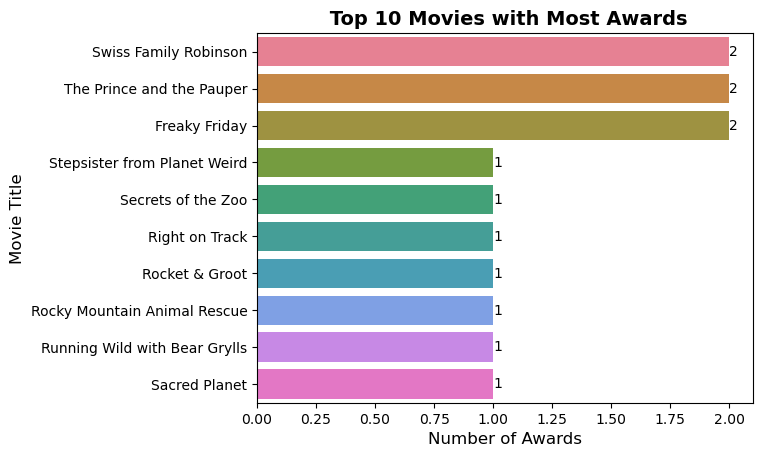

In [118]:
xc=sns.barplot(x = "count", y = "title", data = top10_awards, palette="husl")
xc.bar_label(xc.containers[0], fmt="%d")
plt.xlabel("Number of Awards", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.title(" Top 10 Movies with Most Awards", fontsize=14, fontweight="bold")
plt.show()